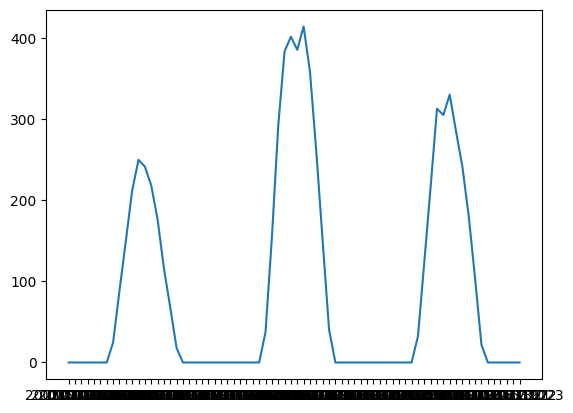

In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np

starttid = "20050308" #YYYYMMDD
sluttid = "20050310" #YYYYMMDD
type = "hourly" #daily, hourly, monthly

#bruker nasa api for solstråling-data fordi det er kult
url = f"https://power.larc.nasa.gov/api/temporal/{type}/point?parameters=ALLSKY_SFC_SW_DWN&community=SB&longitude=10.75&latitude=59.91&start={starttid}&end={sluttid}&format=JSON"

#putter data fra url-en inn i en dict
response = requests.get(url)
data = response.json()
indeks = data["properties"]["parameter"]["ALLSKY_SFC_SW_DWN"]

#henter ut hver "kolonne" i dataene
time_list = list(indeks)
values_list = list(indeks.values())

#plotter dataene ofc
plt.plot(time_list, values_list)
plt.show()